In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [109]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [110]:
# make_blob = datasets.make_blobs()
# df = pd.DataFrame(make_blob[0])
# df['target'] = make_blob[1]

In [111]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

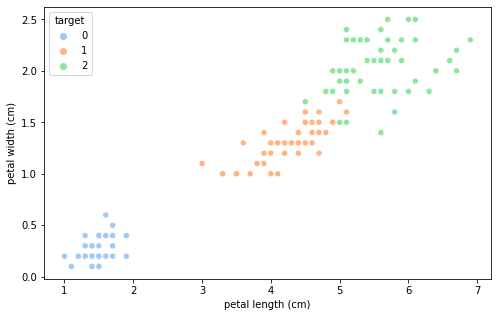

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df["petal length (cm)"],y =df["petal width (cm)"],hue=df['target'],markers=True,palette="pastel")

In [113]:
X = df.drop(['target'],axis = 1)
y = df['target']

###  Function to calculate distance b/w two points -->

In [132]:
def minkowski_distance(a,b,p = 1):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    return distance

print(minkowski_distance(a = X.iloc[0],b = X.iloc[1], p =1))

0.6999999999999993


### Calculating Distance from a given Test Point

In [117]:
test_pt = [4.8,2.7,2.5,0.7]

distances = []
for i,row in X.iterrows():
    distances.append(minkowski_distance(test_pt,row))

df_dists = pd.DataFrame(data = distances,columns=['dist'],index = X.index)

In [136]:
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [119]:
df_nn = df_dists.sort_values(by = ['dist'],axis = 0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [120]:
from collections import Counter

counter = Counter(y[df_nn.index])
counter

Counter({1: 3, 0: 2})

In [121]:
counter.most_common()[0][0]

1

## Scaling and dividing it into train test

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,
                                                random_state = 1)

#Scaling the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Making of KNN Model

In [170]:
def knn_predict(X_train,X_test,y_train,y_test,k,p):
    predictions = []
    
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = minkowski_distance(test_point,train_point,p = p)
            distances.append(distance)
            
        df_dist = pd.DataFrame(data = distances,columns=['dist'],
                              index = y_train.index)
        df_nn = df_dist.sort_values(by=['dist'],axis = 0)[:k]
        
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        predictions.append(prediction)
    return predictions

In [171]:
predictions = knn_predict(X_train,X_test,y_train,y_test, k =5,p = 2)

In [172]:
print(predictions)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [173]:
accuracy = np.mean(y_test ==np.array(predictions))
print(f"Accuary : {accuracy*100} %")

Accuary : 97.36842105263158 %


In [174]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Choosing Best K value

In [224]:
accuracies = []
loss = []

for k in range(1,100):
    predictions = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(np.mean(y_test== np.array(predictions)))
    loss.append(np.mean(y_test != np.array(predictions)))


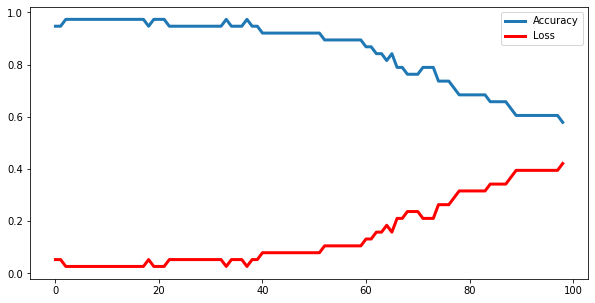

In [245]:
plt.figure(figsize = (10,5))
plt.plot(accuracies,linewidth = 3, label = "Accuracy")
plt.plot(loss,c = "r",linewidth = 3,label = "Loss")
plt.legend()